### Figure 4: Percentiles

In [2]:
import numpy as np
from libpysal.weights import lat2W
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import xesmf as xe
# warnings.filterwarnings("ignore")
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
model = ''
# set mode
mode = 'validation'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)


# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]

pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/dsrnngan_predictions/validation_pred-opt.npy')[0][:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0][:,:,:,0]

# pred_ensemble_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0]
# pred_ensemble_gan = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]

# regrid inputs
grid_in = {"lon": np.linspace(0, 100, 10), "lat": np.linspace(0, 100, 10)}
grid_out = {"lon": np.linspace(0, 100, 100), "lat": np.linspace(0, 100, 100)}
regridder = xe.Regridder(grid_in, grid_out, "bilinear")
inputs_hr = regridder(inputs)


(16253, 10, 10)


In [4]:
percentiles = [10,20,30,40,50,60,70,80,90,95,99,99.5]
real_percentiles,inputs_percentils,unet_percentiles,vaegan_percentiles,dsrnngan_percentiles = [],[],[],[],[]
for q in percentiles:
	real_p = np.percentile(real.flatten(),q)
	inputs_p = np.percentile(inputs_hr.flatten(),q)
	unet_p = np.percentile(pred_cnn.flatten(),q)
	vaegan_p = np.percentile(pred_vaegan.flatten(),q)
	dsrnngan_p = np.percentile(pred_dsrnngan.flatten(),q)
	real_percentiles.append(real_p)
	inputs_percentils.append(inputs_p)
	unet_percentiles.append(unet_p)
	vaegan_percentiles.append(vaegan_p)
	dsrnngan_percentiles.append(dsrnngan_p)



In [8]:

print(inputs_percentils)
print(unet_percentiles)
print(vaegan_percentiles)
print(dsrnngan_percentiles)
print(real_percentiles)

[0.03394892364740372, 0.11998787224292756, 0.2511761993169783, 0.46925603151321416, 0.8325600624084473, 1.4076412916183472, 2.309642791748047, 3.809779167175293, 6.8736371994018555, 10.435566902160645, 19.37974740982054, 23.209522294998123]
[0.18854322880506516, 0.2354418933391571, 0.2373899668455124, 0.2373899668455124, 0.4000813066959381, 1.1887061595916748, 2.21543288230896, 3.6908259868621833, 6.629099369049072, 10.497320175170898, 22.261329689025843, 27.71369555473325]
[0.024113371968269348, 0.04907315969467163, 0.09280014783143997, 0.17384183406829834, 0.3439476788043976, 0.6738590598106384, 1.3600107431411743, 2.774372100830078, 5.909603595733643, 9.861737298965437, 22.137107849121094, 28.30386738777156]
[0.020954439416527748, 0.049369774758815765, 0.1121031865477562, 0.23053970634937293, 0.4245460033416748, 0.7847920656204224, 1.524398684501648, 2.978648471832276, 6.05083518028259, 9.906638145446777, 22.862001476287787, 29.714342412948326]
[0.0, 0.0625, 0.1875, 0.3125, 0.625, 1

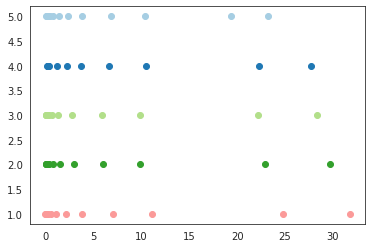

In [9]:

plt.scatter(inputs_percentils,[5,5,5,5,5,5,5,5,5,5,5,5])
plt.scatter(unet_percentiles,[4,4,4,4,4,4,4,4,4,4,4,4])
plt.scatter(vaegan_percentiles,[3,3,3,3,3,3,3,3,3,3,3,3])
plt.scatter(dsrnngan_percentiles,[2,2,2,2,2,2,2,2,2,2,2,2])
plt.scatter(real_percentiles,[1,1,1,1,1,1,1,1,1,1,1,1])

# plt.yticks(['real','input','unet','vaegan','gan'])

In [ ]:
# QQ plot, x axis = obs quantiles, y axis is same and points are model quartiles